# 1. Importing required Libraries 

In [1]:
# Install necessary packages
%pip install pandas numpy scikit-learn matplotlib 


Note: you may need to restart the kernel to use updated packages.


# 2. Load the Dataset

In [15]:
# Importing pandas to work with CSV data
import pandas as pd

# Provide the correct path to your dataset
file_path = 'data/(raw_data)SCMS_Delivery_History_Dataset.csv' 
dataset = pd.read_csv(file_path)

# Confirm dataset loaded successfully
print(" Data Loaded Successfully")
dataset.head()


 Data Loaded Successfully


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# 3. Check for Missing Values

In [2]:
# Check for missing/null values in each column
print("Missing values in each column:\n", dataset.isnull().sum())

# Display basic information about the dataset
dataset.info()





Missing values in each column:
 ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack P

# 4. Cleaning the Dataset

In [3]:
# Dropping rows with missing values to clean the dataset
cleaned_dataset = dataset.dropna()

# Define the target column we want to predict
target_column = 'Pack Price'

# Check if the target column exists in the dataset
if target_column not in cleaned_dataset.columns:
    raise ValueError(f"Target column '{target_column}' not found.")


# 5. Preprocess the Dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate input features (X) and target variable (y)
X = cleaned_dataset.drop(columns=[target_column])
y = cleaned_dataset[target_column]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Standardize the feature values to have mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)




# 6. Train Models

In [5]:
# Import regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Function to train models
def train_models(X_train, y_train):
    # Creating models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=30, random_state=42)
    }

    # Training each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(f"{name} trained.")

    return models  # Return trained models

# Training models with training data
models = train_models(X_train, y_train)


Linear Regression trained.
Random Forest trained.


# 7. Evaluate Models

In [6]:
# Importing metrics to evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

# Function to evaluate models
def evaluate_models(models, X_test, y_test):
    for name, model in models.items():
        preds = model.predict(X_test)  # Make predictions
        mse = mean_squared_error(y_test, preds)  # Calculate Mean Squared Error
        r2 = r2_score(y_test, preds)  # Calculate R² score
        print(f"{name} - MSE: {mse:.2f}, R² Score: {r2:.2f}")  # Print results

# Evaluating the trained models using test data
evaluate_models(models, X_test, y_test)


Linear Regression - MSE: 64.87, R² Score: 0.79
Random Forest - MSE: 4.46, R² Score: 0.99


# 8.1 Compare Actual vs Predicted for Linear Regression Model

In [13]:
# Getting the trained Random Forest model
rf_model = models['Linear Regression']

# Predicting using the test data
y_pred = rf_model.predict(X_test)

# Creating a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Pack Price': y_test.values,
    'Predicted Pack Price': y_pred
})

# Shows the first 10 rows of the comparison
comparison_df.head(10)



,Actual Pack Price,Predicted Pack Price
0,60.82,44.864601
1,41.10,30.667817
2,6.60,7.691984
3,17.14,34.633130
4,12.42,13.688993
5,2.72,3.907969
6,2.10,3.630797
7,4.59,5.142476
8,2.00,2.013195
9,8.58,9.469196


# 8.2  Visualise Prediction for Linear Regression Model using Matplotlib

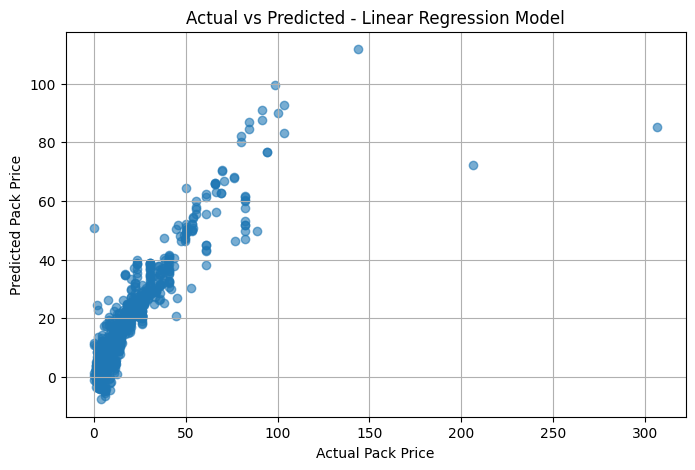

In [14]:
# Importing the plotting library
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)

# Set axis labels and title
plt.xlabel("Actual Pack Price")
plt.ylabel("Predicted Pack Price")
plt.title("Actual vs Predicted - Linear Regression Model")

# Show grid lines
plt.grid(True)

# Display the plot
plt.show()

# 9.1 Compare Actual vs Predicted for Random Forest Model

In [7]:
# Getting the trained Random Forest model
rf_model = models['Random Forest']

# Predicting using the test data
y_pred = rf_model.predict(X_test)

# Creating a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual Pack Price': y_test.values,
    'Predicted Pack Price': y_pred
})

# Shows the first 10 rows of the comparison
comparison_df.head(10)


,Actual Pack Price,Predicted Pack Price
0,60.82,61.391333
1,41.10,41.100000
2,6.60,6.551667
3,17.14,17.960667
4,12.42,12.420000
5,2.72,2.779000
6,2.10,2.089333
7,4.59,4.628000
8,2.00,2.000000
9,8.58,8.509000


# 9.2  Visualise Prediction for Random Forest Model using Matplotlib

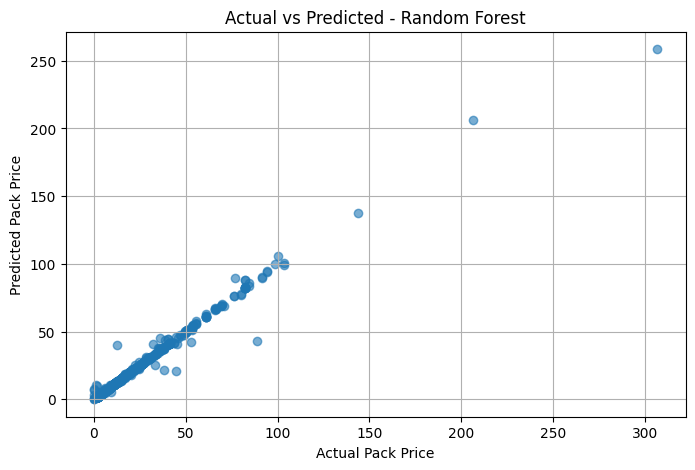

In [ ]:
# Importing the plotting library
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)

# Set axis labels and title
plt.xlabel("Actual Pack Price")
plt.ylabel("Predicted Pack Price")
plt.title("Actual vs Predicted - Random Forest Model")

# Show grid lines
plt.grid(True)

# Display the plot
plt.show()


# 10. Feature Importance

In [9]:
# Import NumPy for array operations
import numpy as np

# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Get feature names from the dataset
feature_names = X.columns

# Sort feature indices by importance (highest first)
sorted_idx = np.argsort(importances)[::-1]

# Print top 10 important features
print("Top 10 important features:")
for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {importances[i]:.4f}")
   

Top 10 important features:
Unit Price: 0.3607
Brand_Generic: 0.2904
Unit of Measure (Per Pack): 0.1843
Item Description_Ritonavir 100mg [Norvir], capsules, cool, 4 x 84 Caps: 0.0657
Vendor_Hoffmann-La Roche ltd Basel: 0.0077
PO Sent to Vendor Date_1/5/11: 0.0072
PQ #_FPQ-6964: 0.0062
Project Code_100-DO-T30: 0.0048
Scheduled Delivery Date_13-Sep-10: 0.0047
Scheduled Delivery Date_2-Aug-10: 0.0036


# 11. Testing with different Estimators

In [10]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to train and evaluate Random Forest with given n_estimators
def evaluate_rf(n_estimators, X_train, y_train, X_test, y_test):
    start_time = time.time()

    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    elapsed = time.time() - start_time

    print(f"n_estimators = {n_estimators}")
    print(f"Training Time: {elapsed:.2f} seconds")
    print(f"MSE: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

for n in [10, 20, 50, 100]:
    evaluate_rf(n, X_train, y_train, X_test, y_test)

n_estimators = 10
Training Time: 40.34 seconds
MSE: 5.57
R² Score: 0.98
------------------------------
n_estimators = 20
Training Time: 75.18 seconds
MSE: 4.49
R² Score: 0.99
------------------------------
n_estimators = 50
Training Time: 186.47 seconds
MSE: 4.42
R² Score: 0.99
------------------------------
n_estimators = 100
Training Time: 371.11 seconds
MSE: 5.19
R² Score: 0.98
------------------------------
